In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import os
import csv
import mlflow
import mlflow.sklearn
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.utils import resample
from mlflow.tracking import MlflowClient  # To manage the model lifecycle


# Set options to display the entire DataFrame without truncation
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', 200)     # Display all rows
pd.set_option('display.max_colwidth', None) # Display full content of each column
pd.set_option('display.expand_frame_repr', False)  # Don't wrap columns to new lines




## DPE

In [2]:
# Chemin du fichier CSV
file_path = './source_data/dpe/dpe_logements_existants_2021.csv'
 
try:
    # Lire le fichier CSV
    dpe_existants_2021 = pd.read_csv(file_path, delimiter=',')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")


dpe_existants_2021 = dpe_existants_2021.drop_duplicates(subset=['N°DPE'])
dpe_existants_2021 = dpe_existants_2021.drop_duplicates()




dpe_existants_2021.head(5)
dpe_existants_2021.shape

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\3761241602.py:6: DtypeWarning: Columns (97,144,231,235,236,237,238,243) have mixed types. Specify dtype option on import or set low_memory=False.
  dpe_existants_2021 = pd.read_csv(file_path, delimiter=',')


(59426, 245)

In [3]:
# Chemin du fichier CSV
file_path = './source_data/dpe/dpe_logements_existants_2022.csv'
 
try:
    # Lire le fichier CSV
    dpe_existants_2022 = pd.read_csv(file_path, delimiter=',')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")

dpe_existants_2022 = dpe_existants_2022.drop_duplicates(subset=['N°DPE'])
dpe_existants_2022 = dpe_existants_2022.drop_duplicates()


dpe_existants_2022.head(5)
dpe_existants_2022.shape

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\2004757248.py:6: DtypeWarning: Columns (38,96,229,231,235,236,237,238,243) have mixed types. Specify dtype option on import or set low_memory=False.
  dpe_existants_2022 = pd.read_csv(file_path, delimiter=',')


(64516, 245)

In [4]:
# Chemin du fichier CSV
file_path = './source_data/dpe/dpe_logements_existants_2023.csv'
 
try:
    # Lire le fichier CSV
    dpe_existants_2023 = pd.read_csv(file_path, delimiter=',')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")


dpe_existants_2023 = dpe_existants_2023.drop_duplicates(subset=['N°DPE'])
dpe_existants_2023 = dpe_existants_2023.drop_duplicates()



dpe_existants_2023.head(5)
dpe_existants_2023.shape

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\2998570929.py:6: DtypeWarning: Columns (38,73,96,165,201,229,230,231,235,236,237,238,243) have mixed types. Specify dtype option on import or set low_memory=False.
  dpe_existants_2023 = pd.read_csv(file_path, delimiter=',')


(224648, 245)

In [5]:
# Chemin du fichier CSV
file_path = './source_data/dpe/dpe_logements_neufs_2021.csv'
 
try:
    # Lire le fichier CSV
    dpe_neufs_2021 = pd.read_csv(file_path, delimiter=',')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")


dpe_neufs_2021 = dpe_neufs_2021.drop_duplicates(subset=['N°DPE'])
dpe_neufs_2021 = dpe_neufs_2021.drop_duplicates()


dpe_neufs_2021.head(5)
dpe_neufs_2021.shape

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\1843446568.py:6: DtypeWarning: Columns (110,117,126,127,129,133) have mixed types. Specify dtype option on import or set low_memory=False.
  dpe_neufs_2021 = pd.read_csv(file_path, delimiter=',')


(101404, 136)

In [6]:
# Chemin du fichier CSV
file_path = './source_data/dpe/dpe_logements_neufs_2022.csv'
 
try:
    # Lire le fichier CSV
    dpe_neufs_2022 = pd.read_csv(file_path, delimiter=',')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")


dpe_neufs_2022 = dpe_neufs_2022.drop_duplicates(subset=['N°DPE'])
dpe_neufs_2022 = dpe_neufs_2022.drop_duplicates()


dpe_neufs_2022.head(5)
dpe_neufs_2022.shape

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\880548037.py:6: DtypeWarning: Columns (114,116,117,126,127,133) have mixed types. Specify dtype option on import or set low_memory=False.
  dpe_neufs_2022 = pd.read_csv(file_path, delimiter=',')


(100516, 136)

In [7]:
# Chemin du fichier CSV
file_path = './source_data/dpe/dpe_logements_neufs_2023.csv'
 
try:
    # Lire le fichier CSV
    dpe_neufs_2023 = pd.read_csv(file_path, delimiter=',')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")


dpe_neufs_2023 = dpe_neufs_2023.drop_duplicates(subset=['N°DPE'])
dpe_neufs_2023 = dpe_neufs_2023.drop_duplicates()


dpe_neufs_2023.head(5)
dpe_neufs_2023.shape

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\2814088356.py:6: DtypeWarning: Columns (113,116,126,127,133) have mixed types. Specify dtype option on import or set low_memory=False.
  dpe_neufs_2023 = pd.read_csv(file_path, delimiter=',')


(100928, 136)

In [8]:
# Chemin du fichier CSV
file_path = './source_data/dpe/dpe_logements_existants_new_1.csv'
 
try:
    # Lire le fichier CSV
    dpe_existants_1 = pd.read_csv(file_path, delimiter=';')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")


dpe_existants_1 = dpe_existants_1.drop_duplicates(subset=['N°DPE'])
dpe_existants_1 = dpe_existants_1.drop_duplicates()


dpe_existants_1.head(5)
dpe_existants_1.shape

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\3827748260.py:6: DtypeWarning: Columns (1,5,11,17,18,20,26,29,38) have mixed types. Specify dtype option on import or set low_memory=False.
  dpe_existants_1 = pd.read_csv(file_path, delimiter=';')


(257495, 93)

In [9]:


# Chemin du fichier CSV
file_path = './source_data/dpe/dpe_logements_existants_new_2.csv'

# Vérifier si le fichier existe
if not os.path.exists(file_path):
    print(f"Le fichier n'existe pas à l'emplacement : {file_path}")
else:
    try:
        # Lire le fichier CSV en ignorant les lignes problématiques
        dpe_existants_2 = pd.read_csv(file_path, 
                                      delimiter=';',  # Essayer d'abord avec point-virgule
                                      quoting=csv.QUOTE_ALL,
                                      on_bad_lines='warn')  # 'warn' au lieu de 'skip' pour voir les problèmes
        
        print(f"Nombre de lignes lues : {len(dpe_existants_2)}")
        
        # Vérifier si la colonne 'Identifiant__BAN' existe
        if 'Identifiant__BAN' not in dpe_existants_2.columns:
            print("La colonne 'Identifiant__BAN' n'existe pas dans le DataFrame.")
            print("Colonnes disponibles :", dpe_existants_1.columns.tolist())
        else:
            # Supprimer les doublons
            dpe_existants_2 = dpe_existants_2.drop_duplicates(subset=['N°DPE'])
            dpe_existants_2 = dpe_existants_2.drop_duplicates()
            
            # Afficher les 5 premières lignes et la forme du DataFrame
            print(dpe_existants_2.head(5))
            print(dpe_existants_2.shape)
    
    except Exception as e:
        print(f"Erreur lors de la lecture ou du traitement du fichier : {e}")

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\1681540338.py:10: ParserWarning: Skipping line 9745: expected 93 fields, saw 94

  dpe_existants_2 = pd.read_csv(file_path,
C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\1681540338.py:10: DtypeWarning: Columns (0,1,5,9,11,15,17,18,20,24,26,27,29,30,36,38,44,67) have mixed types. Specify dtype option on import or set low_memory=False.
  dpe_existants_2 = pd.read_csv(file_path,


Nombre de lignes lues : 434872
  Conso_chauffage_dépensier_é_finale Emission_GES_ECS            Type_énergie_n°1 Type_énergie_n°2 Nom__commune_(BAN) Coût_ECS_énergie_n°2  Emission_GES_chauffage Date_réception_DPE  Coût_ECS_énergie_n°1 Coût_total_5_usages  Conso_ECS_é_finale Emission_GES_5_usages  Code_postal_(BAN)  Conso_éclairage_é_finale  Coût_refroidissement_dépensier Coordonnée_cartographique_X_(BAN) Date_fin_validité_DPE Nombre_niveau_logement Emission_GES_refroidissement_dépensier Type_bâtiment Conso_5_usages_par_m²_é_primaire  Coût_refroidissement  Ubat_W/m²_K  Coût_ECS_dépensier Coût_chauffage  Emission_GES_auxiliaires Emission_GES_5_usages_par_m² Emission_GES_éclairage                              _geopoint Conso_ECS_dépensier_é_primaire Conso_refroidissement_dépensier_é_finale  Conso_ECS_dépensier_é_finale                         Adresse_(BAN)  Version_DPE Date_visite_diagnostiqueur  Coût_ECS Nombre_niveau_immeuble  Surface_habitable_immeuble Coût_éclairage Date_établissement

## ENEDIS

In [10]:
# Chemin du fichier CSV
file_path = './source_data/enedis/enedis_2021.csv'
 
try:
    # Lire le fichier CSV
    enedis_2021 = pd.read_csv(file_path, delimiter=';')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")


enedis_2021 = enedis_2021.drop_duplicates(subset=['id'])
enedis_2021 = enedis_2021.drop_duplicates()

enedis_2021.head(5)
enedis_2021.shape



C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\1167815061.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  enedis_2021 = pd.read_csv(file_path, delimiter=';')


(231082, 22)

In [11]:
# Chemin du fichier CSV
file_path = './source_data/enedis/enedis_2022.csv'
 
try:
    # Lire le fichier CSV
    enedis_2022 = pd.read_csv(file_path, delimiter=';')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")


enedis_2022 = enedis_2022.drop_duplicates(subset=['id'])
enedis_2022 = enedis_2022.drop_duplicates()

enedis_2022.head(5)
enedis_2022.shape

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\3187322205.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  enedis_2022 = pd.read_csv(file_path, delimiter=';')


(228802, 22)

In [12]:
# Chemin du fichier CSV
file_path = './source_data/enedis/enedis_2023.csv'
 
try:
    # Lire le fichier CSV
    enedis_2023 = pd.read_csv(file_path, delimiter=';')
except Exception as e:
    print(f"Erreur lors de la lecture du fichier : {e}")



enedis_2023 = enedis_2023.drop_duplicates(subset=['id'])
enedis_2023 = enedis_2023.drop_duplicates()


enedis_2023.head(5)
enedis_2023.shape

C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\805871299.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  enedis_2023 = pd.read_csv(file_path, delimiter=';')


(230978, 22)

### UNION

In [13]:

# Union des deux DataFrames
dpe_union = pd.concat([dpe_existants_2021, dpe_neufs_2021,dpe_existants_2022, dpe_neufs_2022,dpe_existants_2023, dpe_neufs_2023,dpe_existants_1,dpe_existants_2], ignore_index=True)



dpe_union = dpe_union.drop_duplicates(subset=['N°DPE'])
dpe_union = dpe_union.drop_duplicates()

# Afficher les premières lignes du DataFrame résultant pour vérifier
print(dpe_union.head())


  Conso_chauffage_dépensier_é_finale  Volume_stockage_générateur_ECS_n°1  Conso_é_finale_installation_ECS Nom__commune_(BAN)  Emission_GES_chauffage  Conso_ECS_é_finale_énergie_n°2  Conso_ECS_é_finale_énergie_n°1 Besoin_refroidissement  Conso_chauffage_dépensier_installation_chauffage_n°1 Coût_total_5_usages                                                Configuration_installation_chauffage_n°1  Conso_é_finale_dépensier_installation_ECS      Configuration_installation_ECS Type_installation_chauffage_n°1  Surface_chauffée_installation_chauffage_n°1 Coordonnée_cartographique_X_(BAN) Nombre_niveau_logement  Apports_internes_saison_froid Type_installation_ECS_(général)  Déperditions_murs Conso_5_usages_par_m²_é_primaire  Coût_refroidissement  Ubat_W/m²_K Usage_générateur_ECS_n°1  Coût_ECS_dépensier  Emission_GES_auxiliaires  Année_construction Emission_GES_5_usages_par_m² Emission_GES_éclairage  Apports_solaires_saison_froid  Conso_ECS_dépensier_é_finale      Catégorie_ENR                 

In [14]:
dpe_union.shape

(1093045, 250)

In [15]:

# # Union des deux DataFrames
# dpe_union_2022 = pd.concat([dpe_existants_2022, dpe_neufs_2022], ignore_index=True)

# # Afficher les premières lignes du DataFrame résultant pour vérifier
# print(dpe_union_2022.head())
# dpe_union_2022.shape

In [16]:

# # Union des deux DataFrames
# dpe_union_2023 = pd.concat([dpe_existants_2023, dpe_neufs_2023], ignore_index=True)

# # Afficher les premières lignes du DataFrame résultant pour vérifier
# print(dpe_union_2023.head())
# dpe_union_2023.shape

## Join

In [17]:


# Effectuer une jointure interne entre dpe_union_2021 et enedis_2021
df_merged_2021 = pd.merge(dpe_union, enedis_2021, left_on='Identifiant__BAN', right_on='id', how='inner')


df_merged_2021 = df_merged_2021.drop_duplicates()

# Afficher les premières lignes du DataFrame résultant pour vérifier
df_merged_2021.head()
df_merged_2021.shape

(126996, 272)

In [18]:
# df_merged_2021_1 = df_merged_2021.copy()

In [19]:


# Effectuer une jointure interne entre dpe_union_2021 et enedis_2021
df_merged_2022 = pd.merge(dpe_union, enedis_2022, left_on='Identifiant__BAN', right_on='id', how='inner')



df_merged_2022 = df_merged_2022.drop_duplicates()
# Afficher les premières lignes du DataFrame résultant pour vérifier
print(df_merged_2022.head())
df_merged_2022.shape

  Conso_chauffage_dépensier_é_finale  Volume_stockage_générateur_ECS_n°1  Conso_é_finale_installation_ECS Nom__commune_(BAN)  Emission_GES_chauffage  Conso_ECS_é_finale_énergie_n°2  Conso_ECS_é_finale_énergie_n°1 Besoin_refroidissement  Conso_chauffage_dépensier_installation_chauffage_n°1 Coût_total_5_usages                                                Configuration_installation_chauffage_n°1  Conso_é_finale_dépensier_installation_ECS      Configuration_installation_ECS Type_installation_chauffage_n°1  Surface_chauffée_installation_chauffage_n°1 Coordonnée_cartographique_X_(BAN) Nombre_niveau_logement  Apports_internes_saison_froid Type_installation_ECS_(général)  Déperditions_murs Conso_5_usages_par_m²_é_primaire  Coût_refroidissement  Ubat_W/m²_K Usage_générateur_ECS_n°1  Coût_ECS_dépensier  Emission_GES_auxiliaires  Année_construction Emission_GES_5_usages_par_m² Emission_GES_éclairage  Apports_solaires_saison_froid  Conso_ECS_dépensier_é_finale      Catégorie_ENR                 

(135653, 272)

In [20]:

# Effectuer une jointure interne entre dpe_union_2021 et enedis_2021
df_merged_2023 = pd.merge(dpe_union, enedis_2023, left_on='Identifiant__BAN', right_on='id', how='inner')



df_merged_2023 = df_merged_2023.drop_duplicates()



# Afficher les premières lignes du DataFrame résultant pour vérifier
print(df_merged_2023.head())
df_merged_2023.shape

  Conso_chauffage_dépensier_é_finale  Volume_stockage_générateur_ECS_n°1  Conso_é_finale_installation_ECS Nom__commune_(BAN)  Emission_GES_chauffage  Conso_ECS_é_finale_énergie_n°2  Conso_ECS_é_finale_énergie_n°1 Besoin_refroidissement  Conso_chauffage_dépensier_installation_chauffage_n°1 Coût_total_5_usages                                                Configuration_installation_chauffage_n°1  Conso_é_finale_dépensier_installation_ECS      Configuration_installation_ECS Type_installation_chauffage_n°1  Surface_chauffée_installation_chauffage_n°1 Coordonnée_cartographique_X_(BAN) Nombre_niveau_logement  Apports_internes_saison_froid Type_installation_ECS_(général)  Déperditions_murs Conso_5_usages_par_m²_é_primaire  Coût_refroidissement  Ubat_W/m²_K Usage_générateur_ECS_n°1  Coût_ECS_dépensier  Emission_GES_auxiliaires  Année_construction Emission_GES_5_usages_par_m² Emission_GES_éclairage  Apports_solaires_saison_froid  Conso_ECS_dépensier_é_finale      Catégorie_ENR                 

(143933, 272)

## Data preprocessing

In [21]:
df_merged_2021_1 = df_merged_2023.copy()

In [22]:
df_merged_2021_1.head(5)



,Conso_chauffage_dépensier_é_finale,Volume_stockage_générateur_ECS_n°1,Conso_é_finale_installation_ECS,Nom__commune_(BAN),Emission_GES_chauffage,Conso_ECS_é_finale_énergie_n°2,Conso_ECS_é_finale_énergie_n°1,Besoin_refroidissement,Conso_chauffage_dépensier_installation_chauffage_n°1,Coût_total_5_usages,Configuration_installation_chauffage_n°1,Conso_é_finale_dépensier_installation_ECS,Configuration_installation_ECS,Type_installation_chauffage_n°1,Surface_chauffée_installation_chauffage_n°1,Coordonnée_cartographique_X_(BAN),Nombre_niveau_logement,Apports_internes_saison_froid,Type_installation_ECS_(général),Déperditions_murs,Conso_5_usages_par_m²_é_primaire,Coût_refroidissement,Ubat_W/m²_K,Usage_générateur_ECS_n°1,Coût_ECS_dépensier,Emission_GES_auxiliaires,Année_construction,Emission_GES_5_usages_par_m²,Emission_GES_éclairage,Apports_solaires_saison_froid,Conso_ECS_dépensier_é_finale,Catégorie_ENR,Adresse_(BAN),Type_générateur_froid,Date_visite_diagnostiqueur,N°_étage_appartement,Surface_ventilée,Type_énergie_générateur_ECS_n°1,Présence_production_PV_(0/1),Coût_ECS,Surface_habitable_desservie_par_installation_ECS,Coût_éclairage,Date_établissement_DPE,Coût_total_5_usages_énergie_n°2,Type_générateur_ECS_n°1,Coût_total_5_usages_énergie_n°1,Description_installation_chauffage_n°1,N°_voie_(BAN),Besoin_ECS,N°DPE,Conso_refroidissement_é_finale,Logement_traversant_(0/1),Conso_chauffage_é_primaire,Conso_refroidissement_dépensier_annuel,Adresse_brute,Conso_éclairage_é_primaire,Qualité_isolation_menuiseries,Qualité_isolation_murs,Emission_GES_5_usages_énergie_n°1,Type_émetteur_installation_chauffage_n°1,Emission_GES_5_usages_énergie_n°2,Statut_géocodage,Emission_GES_ECS_énergie_n°2,Classe_inertie_bâtiment,Emission_GES_ECS_énergie_n°1,Nombre_appartement,Modèle_DPE,Description_générateur_chauffage_n°1_installation_n°1,Période_installation_générateur_froid,Description_générateur_ECS_n°1,Production_électricité_PV_(kWhep/an),Conso_5_usages_é_finale,Nombre_logements_desservis_par_installation_ECS,N°_département_(BAN),Conso_refroidissement_é_primaire,Méthode_application_DPE,N°_région_(BAN),Surface_habitable_logement,Code_postal_(brut),Deperditions_planchers_bas,Coordonnée_cartographique_Y_(BAN),_rand,Période_construction,Emission_GES_ECS_dépensier,Emission_GES_chauffage_énergie_n°2,Emission_GES_chauffage_énergie_n°1,Conso_é_finale_dépensier_générateur_ECS_n°1,Emission_GES_refroidissement,Classe_altitude,Indicateur_confort_été,Description_installation_ECS,Qualité_isolation_plancher_haut_comble_aménagé,Emission_GES_ECS,Type_énergie_n°1,Type_énergie_n°2,Coût_ECS_énergie_n°2,Ventilation_postérieure_2012_(0/1),Type_énergie_climatisation,Date_réception_DPE,Coût_ECS_énergie_n°1,Type_installation_ECS,Conso_ECS_é_finale,Présence_brasseur_air_(0/1),Emission_GES_5_usages,Code_postal_(BAN),Conso_éclairage_é_finale,Coût_refroidissement_dépensier,Date_fin_validité_DPE,Deperditions_planchers_hauts,Emission_GES_refroidissement_dépensier,Type_bâtiment,Apports_solaires_saison_chauffe,Conso_chauffage_générateur_n°1_installation_n°1,Coût_chauffage,Déperditions_renouvellement_air,Protection_solaire_exterieure_(0/1),Déperditions_portes,Surface_totale_capteurs_photovoltaïque,_geopoint,Conso_chauffage_installation_chauffage_n°1,Conso_ECS_dépensier_é_primaire,Zone_climatique_,Type_ventilation,Conso_refroidissement_dépensier_é_finale,Usage_générateur_n°1_installation_n°1,Version_DPE,Conso_refroidissement_annuel,Deperditions_baies_vitrées,Conso_chauffage_dépensier_générateur_n°1_installation_n°1,Type_énergie_générateur_n°1_installation_n°1,Déperditions_ponts_thermiques,Type_installation_chauffage,Type_énergie_principale_chauffage,Inertie_lourde_(0/1),Surface_climatisée,Qualité_isolation_enveloppe,Système_production_électricité_origine_renouvelable,Emission_GES_chauffage_dépensier,Besoin_chauffage,Isolation_toiture_(0/1),Conso_ECS_é_primaire,Etiquette_GES,Conso_5_usages_é_finale_énergie_n°1,Conso_5_usages_é_finale_énergie_n°2,Complément_d'adresse_bâtiment,Conso_auxiliaires_é

In [23]:
import pandas as pd

# Calcul de consommation_annuelle_totale_de_l_adresse_kwh
df_merged_2021_1['consommation_annuelle_totale_de_l_adresse_kwh'] = df_merged_2021_1['consommation_annuelle_totale_de_l_adresse_mwh'] * 1000
# Calcul de consommation_annuelle_moyenne_par_site_de_l_adresse_kwh
df_merged_2021_1['consommation_annuelle_moyenne_par_site_de_l_adresse_kwh'] = df_merged_2021_1['consommation_annuelle_totale_de_l_adresse_kwh'] / df_merged_2021_1['nombre_de_logements']

# Calcul de consommation_mensuelle_totale_de_l_adresse_kwh
df_merged_2021_1['consommation_mensuelle_totale_de_l_adresse_kwh'] = df_merged_2021_1['consommation_annuelle_totale_de_l_adresse_kwh'] / 12

# Calcul de consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh
df_merged_2021_1['consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh'] = df_merged_2021_1['consommation_annuelle_moyenne_par_site_de_l_adresse_kwh'] / 12

# Calcul de consommation_annuelle_moyenne_par_site_de_l_adresse_kwhet_par_m2
df_merged_2021_1['consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2'] = df_merged_2021_1['consommation_annuelle_moyenne_par_site_de_l_adresse_kwh'] / df_merged_2021_1["Surface_habitable_logement"]

# Calcul de Cout__annuelle_totale_de_l_adresse_euro
df_merged_2021_1['Cout_annuelle_totale_de_l_adresse_euro'] = df_merged_2021_1['consommation_annuelle_totale_de_l_adresse_kwh'] * 0.2516

# Calcul de cout_annuelle_moyenne_par_site_de_l_adresse_euro
df_merged_2021_1['cout_annuelle_moyenne_par_site_de_l_adresse_euro'] = df_merged_2021_1['consommation_annuelle_moyenne_par_site_de_l_adresse_kwh'] * 0.2516

# Calcul de Cout_mensuelle_totale_de_l_adresse_kwh_euro
df_merged_2021_1['Cout_mensuelle_totale_de_l_adresse_kwh_euro'] = df_merged_2021_1['consommation_mensuelle_totale_de_l_adresse_kwh'] * 0.2516

# Calcul de Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro
df_merged_2021_1['Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro'] = df_merged_2021_1['consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh'] * 0.2516

# Calcul de Cout_annuelle_moyenne_par_site_de_l_adresse_kwhet_par_m2_euro
df_merged_2021_1['Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro'] = df_merged_2021_1['consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2'] * 0.2516
# Ajouter une nouvelle colonne 'year' avec la valeur 2021
df_merged_2021_1['year'] = 2023

# Afficher les premières lignes pour vérifier
df_merged_2021_1.head()


,Conso_chauffage_dépensier_é_finale,Volume_stockage_générateur_ECS_n°1,Conso_é_finale_installation_ECS,Nom__commune_(BAN),Emission_GES_chauffage,Conso_ECS_é_finale_énergie_n°2,Conso_ECS_é_finale_énergie_n°1,Besoin_refroidissement,Conso_chauffage_dépensier_installation_chauffage_n°1,Coût_total_5_usages,Configuration_installation_chauffage_n°1,Conso_é_finale_dépensier_installation_ECS,Configuration_installation_ECS,Type_installation_chauffage_n°1,Surface_chauffée_installation_chauffage_n°1,Coordonnée_cartographique_X_(BAN),Nombre_niveau_logement,Apports_internes_saison_froid,Type_installation_ECS_(général),Déperditions_murs,Conso_5_usages_par_m²_é_primaire,Coût_refroidissement,Ubat_W/m²_K,Usage_générateur_ECS_n°1,Coût_ECS_dépensier,Emission_GES_auxiliaires,Année_construction,Emission_GES_5_usages_par_m²,Emission_GES_éclairage,Apports_solaires_saison_froid,Conso_ECS_dépensier_é_finale,Catégorie_ENR,Adresse_(BAN),Type_générateur_froid,Date_visite_diagnostiqueur,N°_étage_appartement,Surface_ventilée,Type_énergie_générateur_ECS_n°1,Présence_production_PV_(0/1),Coût_ECS,Surface_habitable_desservie_par_installation_ECS,Coût_éclairage,Date_établissement_DPE,Coût_total_5_usages_énergie_n°2,Type_générateur_ECS_n°1,Coût_total_5_usages_énergie_n°1,Description_installation_chauffage_n°1,N°_voie_(BAN),Besoin_ECS,N°DPE,Conso_refroidissement_é_finale,Logement_traversant_(0/1),Conso_chauffage_é_primaire,Conso_refroidissement_dépensier_annuel,Adresse_brute,Conso_éclairage_é_primaire,Qualité_isolation_menuiseries,Qualité_isolation_murs,Emission_GES_5_usages_énergie_n°1,Type_émetteur_installation_chauffage_n°1,Emission_GES_5_usages_énergie_n°2,Statut_géocodage,Emission_GES_ECS_énergie_n°2,Classe_inertie_bâtiment,Emission_GES_ECS_énergie_n°1,Nombre_appartement,Modèle_DPE,Description_générateur_chauffage_n°1_installation_n°1,Période_installation_générateur_froid,Description_générateur_ECS_n°1,Production_électricité_PV_(kWhep/an),Conso_5_usages_é_finale,Nombre_logements_desservis_par_installation_ECS,N°_département_(BAN),Conso_refroidissement_é_primaire,Méthode_application_DPE,N°_région_(BAN),Surface_habitable_logement,Code_postal_(brut),Deperditions_planchers_bas,Coordonnée_cartographique_Y_(BAN),_rand,Période_construction,Emission_GES_ECS_dépensier,Emission_GES_chauffage_énergie_n°2,Emission_GES_chauffage_énergie_n°1,Conso_é_finale_dépensier_générateur_ECS_n°1,Emission_GES_refroidissement,Classe_altitude,Indicateur_confort_été,Description_installation_ECS,Qualité_isolation_plancher_haut_comble_aménagé,Emission_GES_ECS,Type_énergie_n°1,Type_énergie_n°2,Coût_ECS_énergie_n°2,Ventilation_postérieure_2012_(0/1),Type_énergie_climatisation,Date_réception_DPE,Coût_ECS_énergie_n°1,Type_installation_ECS,Conso_ECS_é_finale,Présence_brasseur_air_(0/1),Emission_GES_5_usages,Code_postal_(BAN),Conso_éclairage_é_finale,Coût_refroidissement_dépensier,Date_fin_validité_DPE,Deperditions_planchers_hauts,Emission_GES_refroidissement_dépensier,Type_bâtiment,Apports_solaires_saison_chauffe,Conso_chauffage_générateur_n°1_installation_n°1,Coût_chauffage,Déperditions_renouvellement_air,Protection_solaire_exterieure_(0/1),Déperditions_portes,Surface_totale_capteurs_photovoltaïque,_geopoint,Conso_chauffage_installation_chauffage_n°1,Conso_ECS_dépensier_é_primaire,Zone_climatique_,Type_ventilation,Conso_refroidissement_dépensier_é_finale,Usage_générateur_n°1_installation_n°1,Version_DPE,Conso_refroidissement_annuel,Deperditions_baies_vitrées,Conso_chauffage_dépensier_générateur_n°1_installation_n°1,Type_énergie_générateur_n°1_installation_n°1,Déperditions_ponts_thermiques,Type_installation_chauffage,Type_énergie_principale_chauffage,Inertie_lourde_(0/1),Surface_climatisée,Qualité_isolation_enveloppe,Système_production_électricité_origine_renouvelable,Emission_GES_chauffage_dépensier,Besoin_chauffage,Isolation_toiture_(0/1),Conso_ECS_é_primaire,Etiquette_GES,Conso_5_usages_é_finale_énergie_n°1,Conso_5_usages_é_finale_énergie_n°2,Complément_d'adresse_bâtiment,Conso_auxiliaires_é

In [24]:
# Sélectionner les colonnes pertinentes
colonnes_utiles = [
    'consommation_annuelle_totale_de_l_adresse_kwh',
    'Cout_annuelle_totale_de_l_adresse_euro',
    'Surface_habitable_logement',
    'consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2',
    'Emission_GES_5_usages'
]
df_merged_2021_2_selected = df_merged_2021_1.copy()
# Sélectionner les colonnes pertinentes
df_merged_2021_2_selected = df_merged_2021_1[colonnes_utiles]

In [25]:
df_merged_2021_2_selected.describe()

,consommation_annuelle_totale_de_l_adresse_kwh,Cout_annuelle_totale_de_l_adresse_euro,Surface_habitable_logement,consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2
count,1.439330e+05,143933.000000,141561.000000,141561.000000
mean,8.714544e+04,21925.793654,60.783832,52.473947
std,9.732394e+04,24486.702983,129.133090,39.854922
min,9.200000e+01,23.147200,3.400000,0.023842
25%,3.080800e+04,7751.292800,40.600000,24.088727
50%,5.443300e+04,13695.342800,56.300000,37.665664
75%,1.033180e+05,25994.808800,70.000000,72.629085
max,1.559298e+06,392319.376800,23254.000000,807.606178


In [26]:
df_merged_2021_2 = df_merged_2021_1.copy()

## Data cleaning

In [27]:

df_merged_2021_2['Emission_GES_5_usages'] = pd.to_numeric(df_merged_2021_2['Emission_GES_5_usages'], errors='coerce')

df_merged_2021_2 = df_merged_2021_2[(df_merged_2021_2['consommation_annuelle_totale_de_l_adresse_kwh'] > 100) &
                            (df_merged_2021_2['Cout_annuelle_totale_de_l_adresse_euro'] > 10)]
df_merged_2021_2 = df_merged_2021_2[(df_merged_2021_2['Surface_habitable_logement'] >= 9) & 
                            (df_merged_2021_2['Surface_habitable_logement'] < 2000)]
df_merged_2021_2 = df_merged_2021_2[(df_merged_2021_2['consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2'] > 1) & 
                            (df_merged_2021_2['consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2'] < 2000)]
seuil_max_kwh = df_merged_2021_2['consommation_annuelle_totale_de_l_adresse_kwh'].mean() + 5 * df_merged_2021_2['consommation_annuelle_totale_de_l_adresse_kwh'].std()
df_merged_2021_2 = df_merged_2021_2[df_merged_2021_2['consommation_annuelle_totale_de_l_adresse_kwh'] < seuil_max_kwh]
seuil_max_ges = df_merged_2021_2['Emission_GES_5_usages'].mean() + 5 * df_merged_2021_2['Emission_GES_5_usages'].std()
df_merged_2021_2 = df_merged_2021_2[df_merged_2021_2['Emission_GES_5_usages'] < seuil_max_ges]



df_merged_2021_2.head(5)



,Conso_chauffage_dépensier_é_finale,Volume_stockage_générateur_ECS_n°1,Conso_é_finale_installation_ECS,Nom__commune_(BAN),Emission_GES_chauffage,Conso_ECS_é_finale_énergie_n°2,Conso_ECS_é_finale_énergie_n°1,Besoin_refroidissement,Conso_chauffage_dépensier_installation_chauffage_n°1,Coût_total_5_usages,Configuration_installation_chauffage_n°1,Conso_é_finale_dépensier_installation_ECS,Configuration_installation_ECS,Type_installation_chauffage_n°1,Surface_chauffée_installation_chauffage_n°1,Coordonnée_cartographique_X_(BAN),Nombre_niveau_logement,Apports_internes_saison_froid,Type_installation_ECS_(général),Déperditions_murs,Conso_5_usages_par_m²_é_primaire,Coût_refroidissement,Ubat_W/m²_K,Usage_générateur_ECS_n°1,Coût_ECS_dépensier,Emission_GES_auxiliaires,Année_construction,Emission_GES_5_usages_par_m²,Emission_GES_éclairage,Apports_solaires_saison_froid,Conso_ECS_dépensier_é_finale,Catégorie_ENR,Adresse_(BAN),Type_générateur_froid,Date_visite_diagnostiqueur,N°_étage_appartement,Surface_ventilée,Type_énergie_générateur_ECS_n°1,Présence_production_PV_(0/1),Coût_ECS,Surface_habitable_desservie_par_installation_ECS,Coût_éclairage,Date_établissement_DPE,Coût_total_5_usages_énergie_n°2,Type_générateur_ECS_n°1,Coût_total_5_usages_énergie_n°1,Description_installation_chauffage_n°1,N°_voie_(BAN),Besoin_ECS,N°DPE,Conso_refroidissement_é_finale,Logement_traversant_(0/1),Conso_chauffage_é_primaire,Conso_refroidissement_dépensier_annuel,Adresse_brute,Conso_éclairage_é_primaire,Qualité_isolation_menuiseries,Qualité_isolation_murs,Emission_GES_5_usages_énergie_n°1,Type_émetteur_installation_chauffage_n°1,Emission_GES_5_usages_énergie_n°2,Statut_géocodage,Emission_GES_ECS_énergie_n°2,Classe_inertie_bâtiment,Emission_GES_ECS_énergie_n°1,Nombre_appartement,Modèle_DPE,Description_générateur_chauffage_n°1_installation_n°1,Période_installation_générateur_froid,Description_générateur_ECS_n°1,Production_électricité_PV_(kWhep/an),Conso_5_usages_é_finale,Nombre_logements_desservis_par_installation_ECS,N°_département_(BAN),Conso_refroidissement_é_primaire,Méthode_application_DPE,N°_région_(BAN),Surface_habitable_logement,Code_postal_(brut),Deperditions_planchers_bas,Coordonnée_cartographique_Y_(BAN),_rand,Période_construction,Emission_GES_ECS_dépensier,Emission_GES_chauffage_énergie_n°2,Emission_GES_chauffage_énergie_n°1,Conso_é_finale_dépensier_générateur_ECS_n°1,Emission_GES_refroidissement,Classe_altitude,Indicateur_confort_été,Description_installation_ECS,Qualité_isolation_plancher_haut_comble_aménagé,Emission_GES_ECS,Type_énergie_n°1,Type_énergie_n°2,Coût_ECS_énergie_n°2,Ventilation_postérieure_2012_(0/1),Type_énergie_climatisation,Date_réception_DPE,Coût_ECS_énergie_n°1,Type_installation_ECS,Conso_ECS_é_finale,Présence_brasseur_air_(0/1),Emission_GES_5_usages,Code_postal_(BAN),Conso_éclairage_é_finale,Coût_refroidissement_dépensier,Date_fin_validité_DPE,Deperditions_planchers_hauts,Emission_GES_refroidissement_dépensier,Type_bâtiment,Apports_solaires_saison_chauffe,Conso_chauffage_générateur_n°1_installation_n°1,Coût_chauffage,Déperditions_renouvellement_air,Protection_solaire_exterieure_(0/1),Déperditions_portes,Surface_totale_capteurs_photovoltaïque,_geopoint,Conso_chauffage_installation_chauffage_n°1,Conso_ECS_dépensier_é_primaire,Zone_climatique_,Type_ventilation,Conso_refroidissement_dépensier_é_finale,Usage_générateur_n°1_installation_n°1,Version_DPE,Conso_refroidissement_annuel,Deperditions_baies_vitrées,Conso_chauffage_dépensier_générateur_n°1_installation_n°1,Type_énergie_générateur_n°1_installation_n°1,Déperditions_ponts_thermiques,Type_installation_chauffage,Type_énergie_principale_chauffage,Inertie_lourde_(0/1),Surface_climatisée,Qualité_isolation_enveloppe,Système_production_électricité_origine_renouvelable,Emission_GES_chauffage_dépensier,Besoin_chauffage,Isolation_toiture_(0/1),Conso_ECS_é_primaire,Etiquette_GES,Conso_5_usages_é_finale_énergie_n°1,Conso_5_usages_é_finale_énergie_n°2,Complément_d'adresse_bâtiment,Conso_auxiliaires_é

In [28]:
df_merged_2021_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139998 entries, 0 to 143932
Columns: 283 entries, Conso_chauffage_dépensier_é_finale to year
dtypes: float64(141), int64(9), object(133)
memory usage: 303.3+ MB


In [29]:
df_merged_2021_2.describe()

,Volume_stockage_générateur_ECS_n°1,Conso_é_finale_installation_ECS,Emission_GES_chauffage,Conso_ECS_é_finale_énergie_n°2,Conso_ECS_é_finale_énergie_n°1,Conso_chauffage_dépensier_installation_chauffage_n°1,Conso_é_finale_dépensier_installation_ECS,Surface_chauffée_installation_chauffage_n°1,Apports_internes_saison_froid,Déperditions_murs,Coût_refroidissement,Ubat_W/m²_K,Coût_ECS_dépensier,Emission_GES_auxiliaires,Année_construction,Apports_solaires_saison_froid,Conso_ECS_dépensier_é_finale,N°_étage_appartement,Surface_ventilée,Coût_ECS,Surface_habitable_desservie_par_installation_ECS,Coût_total_5_usages_énergie_n°2,Coût_total_5_usages_énergie_n°1,Conso_chauffage_é_primaire,Conso_refroidissement_dépensier_annuel,Conso_éclairage_é_primaire,Emission_GES_5_usages_énergie_n°1,Emission_GES_5_usages_énergie_n°2,Emission_GES_ECS_énergie_n°2,Emission_GES_ECS_énergie_n°1,Nombre_appartement,Production_électricité_PV_(kWhep/an),Conso_5_usages_é_finale,Nombre_logements_desservis_par_installation_ECS,Conso_refroidissement_é_primaire,N°_région_(BAN),Surface_habitable_logement,Code_postal_(brut),Deperditions_planchers_bas,Coordonnée_cartographique_Y_(BAN),_rand,Emission_GES_ECS_dépensier,Emission_GES_chauffage_énergie_n°2,Emission_GES_chauffage_énergie_n°1,Conso_é_finale_dépensier_générateur_ECS_n°1,Emission_GES_refroidissement,Coût_ECS_énergie_n°1,Conso_ECS_é_finale,Emission_GES_5_usages,Code_postal_(BAN),Conso_éclairage_é_finale,Coût_refroidissement_dépensier,Deperditions_planchers_hauts,Apports_solaires_saison_chauffe,Conso_chauffage_générateur_n°1_installation_n°1,Déperditions_renouvellement_air,Déperditions_portes,Surface_totale_capteurs_photovoltaïque,Conso_chauffage_installation_chauffage_n°1,Version_DPE,Conso_refroidissement_annuel,Deperditions_baies_vitrées,Conso_chauffage_dépensier_générateur_n°1_installation_n°1,Déperditions_ponts_thermiques,Surface_climatisée,Emission_GES_chauffage_dépensier,Besoin_chauffage,Conso_ECS_é_primaire,Conso_5_usages_é_finale_énergie_n°1,Conso_5_usages_é_finale_énergie_n°2,Conso_auxiliaires_é_primaire,Conso_auxiliaires_é_finale,Conso_é_finale_générateur_ECS_n°1,Conso_chauffage_é_finale,Coût_chauffage_dépensier,Conso_refroidissement_dépensier_é_primaire,Besoin_refroidissement_dépensier,Coût_chauffage_énergie_n°1,_i,Coût_chauffage_énergie_n°2,Apports_internes_saison_chauffe_,Conso_5_usages/m²_é_finale,Hauteur_sous-plafond,Coût_auxiliaires,Conso_chauffage_dépensier_é_primaire,Score_BAN,Deperditions_enveloppe,Nombre_module,Conso_5_usages_é_primaire,Conso_chauffage_é_finale_énergie_n°2,Conso_chauffage_é_finale_énergie_n°1,_score,Conso_chauffage_dépensier_installation_chauffage_n°2,Surface_chauffée_installation_chauffage_n°2,Surface_habitable_immeuble,Conso_chauffage_générateur_n°1_installation_n°2,Conso_chauffage_installation_chauffage_n°2,Conso_chauffage_dépensier_générateur_n°1_installation_n°2,Conso_ECS_é_finale_énergie_n°3,Conso_chauffage_générateur_n°2_installation_n°1,Coût_total_5_usages_énergie_n°3,Conso_chauffage_dépensier_générateur_n°2_installation_n°1,Emission_GES_5_usages_énergie_n°3,Emission_GES_ECS_énergie_n°3,Emission_GES_chauffage_énergie_n°3,Coût_ECS_énergie_n°3,Electricité_PV_autoconsommée,Conso_5_usages_é_finale_énergie_n°3,Coût_chauffage_énergie_n°3,Conso_chauffage_é_finale_énergie_n°3,COP_générateur_ECS_n°1,Production_ecs_solaire_installation,Facteur_couverture_solaire,Conso_chauffage_générateur_n°2_installation_n°2,Conso_chauffage_dépensier_générateur_n°2_installation_n°2,Facteur_couverture_solaire_saisi,Facteur_couverture_solaire_installation_chauffage_n°2,Surface_tertiaire_immeuble,Facteur_couverture_solaire_installation_chauffage_n°1,Volume_stockage_générateur_ECS_n°2,Conso_é_finale_dépensier_générateur_ECS_n°2,Conso_é_finale_générateur_ECS_n°2,N°_RPLS_logement,Facteur_couverture_solaire_saisi_installation_chauffage_n°1,COP_générateur_ECS_n°2,Clé_répartition_chauffage,Année,annee,numero_de_voie,indice_de_repetition,code_commune,nombre_de_logements,consommation_annuelle_totale_de_l_adr

In [30]:
# Calculate the number of null values in each column
null_counts = df_merged_2021_2.isna().sum()

# Calculate the percentage of null values in each column
total_rows = len(df_merged_2021_2)
null_percentages = (null_counts / total_rows) * 100

# Create a new DataFrame to display the results
null_df = pd.DataFrame({'Null Values': null_counts, 'Null Percentage': null_percentages})
# null_df.head(200)

In [31]:
# Calculate the number of null values in each column
null_counts = df_merged_2021_2.select_dtypes("number").isna().sum()

# Calculate the percentage of null values in each column
total_rows = len(df_merged_2021_2)
null_percentages = (null_counts / total_rows) * 100

# Create a new DataFrame to display the results
null_df = pd.DataFrame({'Null Values': null_counts, 'Null Percentage': null_percentages})
# null_df.head(200)

In [32]:
# Filter the null_df DataFrame to display only rows where the Null Percentage is below 30%
filtered_null_df = null_df[null_df['Null Percentage'] < 30]
filtered_null_df.head(200)



,Null Values,Null Percentage
Emission_GES_chauffage,0,0.000000
Coût_refroidissement,0,0.000000
Ubat_W/m²_K,0,0.000000
Coût_ECS_dépensier,1,0.000714
Emission_GES_auxiliaires,0,0.000000
Conso_ECS_dépensier_é_finale,0,0.000000
Coût_ECS,0,0.000000
Conso_chauffage_é_primaire,0,0.000000
Conso_éclairage_é_primaire,0,0.000000
Emission_GES_5_usages_énergie_n°1,0,0.000000


In [33]:
df_1 = df_merged_2021_2.copy()

In [34]:
df_final_clustering = df_1.copy()

#### Final df to join with the clustering result

In [35]:
# Liste des colonnes à sélectionner
colonnes_a_selectionner = [
    'N°DPE',
    'Date_établissement_DPE',
    'Version_DPE',
    'Surface_habitable_immeuble',
    'Emission_GES_5_usages_énergie_n°1',
    'Hauteur_sous-plafond',
    'Emission_GES_5_usages',
    'Emission_GES_5_usages_par_m²',
    'Ubat_W/m²_K',
    'Surface_habitable_logement',
    'Emission_GES_chauffage_dépensier',
    'Type_énergie_n°1',
    'Nom__commune_(BAN)',
    'Code_postal_(BAN)',
    'Date_fin_validité_DPE',
    'Type_bâtiment',
    'Qualité_isolation_enveloppe',
    'Qualité_isolation_menuiseries',
    'Qualité_isolation_murs',
    'Etiquette_GES',
    'Etiquette_DPE',
    'Nom__commune_(Brut)',
    'Qualité_isolation_plancher_bas',
    'Catégorie_ENR',
    'code_departement', 'code_region'	, 'segment_de_client', 'nom_commune', 'code_commune',
    'year',
    'consommation_annuelle_totale_de_l_adresse_kwh',
    'consommation_annuelle_moyenne_par_site_de_l_adresse_kwh',
    'Cout_annuelle_totale_de_l_adresse_euro',
    'cout_annuelle_moyenne_par_site_de_l_adresse_euro',
    'consommation_mensuelle_totale_de_l_adresse_kwh',
    'consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh',
    'Cout_mensuelle_totale_de_l_adresse_kwh_euro',
    'Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro',
    'consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2',
    'Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro',
    'nombre_de_logements',
    'consommation_annuelle_totale_de_l_adresse_mwh',
    'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh',
    'consommation_annuelle_moyenne_de_la_commune_mwh'
]



# Sélection des colonnes
df_final_clustering = df_final_clustering[colonnes_a_selectionner]

# Affichage du DataFrame sélectionné
df_final_clustering.head(5)


,N°DPE,Date_établissement_DPE,Version_DPE,Surface_habitable_immeuble,Emission_GES_5_usages_énergie_n°1,Hauteur_sous-plafond,Emission_GES_5_usages,Emission_GES_5_usages_par_m²,Ubat_W/m²_K,Surface_habitable_logement,Emission_GES_chauffage_dépensier,Type_énergie_n°1,Nom__commune_(BAN),Code_postal_(BAN),Date_fin_validité_DPE,Type_bâtiment,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Etiquette_GES,Etiquette_DPE,Nom__commune_(Brut),Qualité_isolation_plancher_bas,Catégorie_ENR,code_departement,code_region,segment_de_client,nom_commune,code_commune,year,consommation_annuelle_totale_de_l_adresse_kwh,consommation_annuelle_moyenne_par_site_de_l_adresse_kwh,Cout_annuelle_totale_de_l_adresse_euro,cout_annuelle_moyenne_par_site_de_l_adresse_euro,consommation_mensuelle_totale_de_l_adresse_kwh,consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh,Cout_mensuelle_totale_de_l_adresse_kwh_euro,Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro,consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2,Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro,nombre_de_logements,consommation_annuelle_totale_de_l_adresse_mwh,consommation_annuelle_moyenne_par_site_de_l_adresse_mwh,consommation_annuelle_moyenne_de_la_commune_mwh
0,2125E0981916Z,2021-12-22,2.0,220.8,5594.5,2.9,5960.8,27.0,1.28,220.8,6472.3,Gaz naturel,Besançon,25000.0,2031-12-21,appartement,insuffisante,bonne,insuffisante,C,D,NaN,très bonne,chauffage au bois,25,27,RESIDENTIEL,Besançon,25056,2023,26971.0,2697.100000,6785.9036,678.590360,2247.583333,224.758333,565.491967,56.549197,12.215127,3.073326,10,26.971,2.697,2.388
1,2136E0953985D,2021-12-01,1.1,NaN,794.8,2.5,794.8,19.0,1.39,41.0,646.0,Électricité,Châteauroux,36000.0,2031-11-30,appartement,insuffisante,moyenne,insuffisante,C,E,NaN,très bonne,chauffage au bois,36,24,RESIDENTIEL,Châteauroux,36044,2023,18255.0,960.789474,4592.9580,241.734632,1521.250000,80.065789,382.746500,20.144553,23.433890,5.895967,19,18.255,0.961,3.040
2,2192E1018177F,2021-10-25,1.1,NaN,1783.8,2.5,1783.8,48.0,3.37,36.4,1329.9,Gaz naturel,Sceaux,92330.0,2031-10-24,appartement,insuffisante,insuffisante,insuffisante,D,D,NaN,très bonne,NaN,92,11,RESIDENTIEL,Sceaux,92071,2023,18498.0,1422.923077,4654.0968,358.007446,1541.500000,118.576923,387.841400,29.833954,39.091293,9.835369,13,18.498,1.423,3.366
3,2192E1018146A,2021-10-25,1.1,NaN,3672.5,2.5,3672.5,33.0,1.24,109.0,797.9,Électricité,Bourg-la-Reine,92340.0,2031-10-24,appartement,insuffisante,moyenne,insuffisante,D,E,NaN,très bonne,NaN,92,11,RESIDENTIEL,Bourg-la-Reine,92014,2023,141216.0,3444.292683,35529.9456,866.584039,11768.000000,287.024390,2960.828800,72.215337,31.599015,7.950312,41,141.216,3.444,3.052
5,2178E1036320M,2021-07-19,2.0,124.7,585.2,2.5,498.8,4.0,0.72,124.7,453.6,Électricité,Carrières-sur-Seine,78420.0,2031-07-18,appartement,moyenne,moyenne,bonne,A,C,NaN,insuffisante,NaN,78,11,RESIDENTIEL,Carrières-sur-Seine,78124,2023,107761.0,6338.882353,27112.6676,1594.862800,8980.083333,528.240196,2259.388967,132.905233,50.833058,12.789597,17,107.761,6.339,4.329


In [36]:
df_selection = df_final_clustering.copy()

### Columns importance selection

In [37]:


# # Ajout d'une colonne aléatoire
# np.random.seed(42)  # Pour la reproductibilité
# df_1['colonne_random'] = np.random.rand(len(df_1))

# # Colonnes pour la sélection
# clustering_columns = [
#     'Emission_GES_5_usages',
#     'Emission_GES_5_usages_par_m²',
#     'Ubat_W/m²_K',
#     'Surface_habitable_logement',
#     'consommation_annuelle_totale_de_l_adresse_kwh',
#     'consommation_annuelle_moyenne_par_site_de_l_adresse_kwh',
#     'Cout_annuelle_totale_de_l_adresse_euro',
#     'cout_annuelle_moyenne_par_site_de_l_adresse_euro',
#     'consommation_mensuelle_totale_de_l_adresse_kwh',
#     'consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh',
#     'Cout_mensuelle_totale_de_l_adresse_kwh_euro',
#     'Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro',
#     'consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2',
#     'Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro',
#     'colonne_random'
# ]

# # Sélectionner les colonnes dans le DataFrame
# df_selected = df_1[clustering_columns]

# # Imputation des valeurs manquantes
# imputer = SimpleImputer(strategy='mean')
# df_imputed = df_selected.copy()
# df_imputed[df_imputed.select_dtypes(include='number').columns] = imputer.fit_transform(df_imputed.select_dtypes(include='number'))

# # Séparer les caractéristiques et la cible
# X = df_imputed.drop('colonne_random', axis=1)  # On exclut la colonne random de la sélection
# y = np.random.randint(0, 2, size=len(X))  # Target binaire aléatoire

# # Utiliser SelectKBest avec ANOVA F-value
# selector = SelectKBest(score_func=f_classif, k='all')  # 'all' pour évaluer toutes les caractéristiques
# selector.fit(X, y)

# # Obtenir les scores des caractéristiques
# scores = selector.scores_

# # Créer un DataFrame pour afficher les scores
# feature_scores = pd.DataFrame({
#     'Feature': X.columns,
#     'Score': scores
# }).sort_values(by='Score', ascending=False)

# print("Scores des caractéristiques :")
# print(feature_scores)

# # Filtrer les colonnes importantes (par exemple, sélectionner les 10 meilleures caractéristiques)
# top_features = feature_scores.head(10)['Feature'].tolist()

# # Sélectionner les colonnes les plus importantes
# df_final = df_imputed[top_features]

# # Standardisation des données
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_final)

# # Convertir les données standardisées en DataFrame
# df_scaled = pd.DataFrame(df_scaled, columns=top_features)

# print("\nColonnes sélectionnées pour le clustering :")
# print(df_scaled.head())


### Clustering output columns

In [38]:




# Colonnes pour la sélection
clustering_columns = [
'Cout_annuelle_totale_de_l_adresse_euro',
'consommation_annuelle_totale_de_l_adresse_kwh', 
'consommation_mensuelle_totale_de_l_adresse_kwh',   
'Cout_mensuelle_totale_de_l_adresse_kwh_euro',
'consommation_annuelle_moyenne_par_site_de_l_adresse_kwh',
'Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro',
'consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh',
'cout_annuelle_moyenne_par_site_de_l_adresse_euro',
'consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2',
'Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro',

]


df_1_1 = df_1.copy()
df_1_1 = df_1_1[clustering_columns]
df_1_1.head(5)

,Cout_annuelle_totale_de_l_adresse_euro,consommation_annuelle_totale_de_l_adresse_kwh,consommation_mensuelle_totale_de_l_adresse_kwh,Cout_mensuelle_totale_de_l_adresse_kwh_euro,consommation_annuelle_moyenne_par_site_de_l_adresse_kwh,Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro,consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh,cout_annuelle_moyenne_par_site_de_l_adresse_euro,consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2,Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro
0,6785.9036,26971.0,2247.583333,565.491967,2697.100000,56.549197,224.758333,678.590360,12.215127,3.073326
1,4592.9580,18255.0,1521.250000,382.746500,960.789474,20.144553,80.065789,241.734632,23.433890,5.895967
2,4654.0968,18498.0,1541.500000,387.841400,1422.923077,29.833954,118.576923,358.007446,39.091293,9.835369
3,35529.9456,141216.0,11768.000000,2960.828800,3444.292683,72.215337,287.024390,866.584039,31.599015,7.950312
5,27112.6676,107761.0,8980.083333,2259.388967,6338.882353,132.905233,528.240196,1594.862800,50.833058,12.789597


In [39]:
df_1_1.describe()

,Cout_annuelle_totale_de_l_adresse_euro,consommation_annuelle_totale_de_l_adresse_kwh,consommation_mensuelle_totale_de_l_adresse_kwh,Cout_mensuelle_totale_de_l_adresse_kwh_euro,consommation_annuelle_moyenne_par_site_de_l_adresse_kwh,Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro,consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh,cout_annuelle_moyenne_par_site_de_l_adresse_euro,consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2,Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro
count,139998.000000,139998.000000,139998.000000,139998.000000,139998.000000,139998.000000,139998.000000,139998.000000,139998.000000,139998.000000
mean,21315.835775,84721.127880,7060.093990,1776.319648,2476.368834,51.921200,206.364069,623.054399,52.529945,13.216534
std,21841.486607,86810.360122,7234.196677,1820.123884,1452.567416,30.455497,121.047285,365.465962,39.339025,9.897699
min,157.753200,627.000000,52.250000,13.146100,43.552632,0.913154,3.629386,10.957842,1.002007,0.252105
25%,7777.710800,30913.000000,2576.083333,648.142567,1450.541667,30.413024,120.878472,364.956283,24.207408,6.090584
50%,13716.728800,54518.000000,4543.166667,1143.060733,1976.076923,41.431746,164.673077,497.180954,37.795833,9.509432
75%,25937.947200,103092.000000,8591.000000,2161.495600,3330.405405,69.827500,277.533784,837.930000,72.695895,18.290287
max,144559.044400,574559.000000,47879.916667,12046.587033,25683.181818,538.490712,2140.265152,6461.888545,807.606178,203.193714


In [40]:
df_1_1_2 = df_1_1.copy()

In [41]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Calculer le nombre de valeurs nulles dans chaque colonne
null_counts = df_1_1_2.select_dtypes("number").isna().sum()

# Calculer le pourcentage de valeurs nulles dans chaque colonne
total_rows = len(df_1_1_2)
null_percentages = (null_counts / total_rows) * 100

# Créer un nouveau DataFrame pour afficher les résultats
null_df_1_1_2 = pd.DataFrame({'Null Values': null_counts, 'Null Percentage': null_percentages})
print(null_df_1_1_2.head(200))



                                                                   Null Values  Null Percentage
Cout_annuelle_totale_de_l_adresse_euro                                       0              0.0
consommation_annuelle_totale_de_l_adresse_kwh                                0              0.0
consommation_mensuelle_totale_de_l_adresse_kwh                               0              0.0
Cout_mensuelle_totale_de_l_adresse_kwh_euro                                  0              0.0
consommation_annuelle_moyenne_par_site_de_l_adresse_kwh                      0              0.0
Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro                        0              0.0
consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh                     0              0.0
cout_annuelle_moyenne_par_site_de_l_adresse_euro                             0              0.0
consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2            0              0.0
Cout_annuelle_moyenne_par_site_de_l_adre

In [42]:
# Créer une copie du DataFrame
df_2 = df_1_1_2.copy()


### Imputing messing values

In [43]:
# Étape 1: Remplacer les valeurs nulles dans toutes les colonnes numériques par la moyenne
imputer = SimpleImputer(strategy='mean')
df_2[df_2.select_dtypes(include='number').columns] = imputer.fit_transform(df_2.select_dtypes(include='number'))

# Afficher le DataFrame modifié
print(df_2.head())


   Cout_annuelle_totale_de_l_adresse_euro  consommation_annuelle_totale_de_l_adresse_kwh  consommation_mensuelle_totale_de_l_adresse_kwh  Cout_mensuelle_totale_de_l_adresse_kwh_euro  consommation_annuelle_moyenne_par_site_de_l_adresse_kwh  Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro  consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh  cout_annuelle_moyenne_par_site_de_l_adresse_euro  consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2  Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro
0                               6785.9036                                        26971.0                                     2247.583333                                   565.491967                                              2697.100000                                              56.549197                                                224.758333                                        678.590360                                                          12.21512

In [44]:
# Calculate the number of null values in each column
null_counts = df_2.isna().sum()

# Calculate the percentage of null values in each column
total_rows = len(df_2)
null_percentages = (null_counts / total_rows) * 100

# Create a new DataFrame to display the results
null_df_2 = pd.DataFrame({'Null Values': null_counts, 'Null Percentage': null_percentages})
null_df_2.head(200)

,Null Values,Null Percentage
Cout_annuelle_totale_de_l_adresse_euro,0,0.0
consommation_annuelle_totale_de_l_adresse_kwh,0,0.0
consommation_mensuelle_totale_de_l_adresse_kwh,0,0.0
Cout_mensuelle_totale_de_l_adresse_kwh_euro,0,0.0
consommation_annuelle_moyenne_par_site_de_l_adresse_kwh,0,0.0
Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro,0,0.0
consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh,0,0.0
cout_annuelle_moyenne_par_site_de_l_adresse_euro,0,0.0
consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2,0,0.0
Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro,0,0.0


In [45]:
df_imputed = df_2.copy()

### Standardize

In [46]:
# Step 2: Standardize the data
scaler = StandardScaler()
df_2_scaled = scaler.fit_transform(df_imputed)

# Convert the scaled data back to a DataFrame
df_2_scaled = pd.DataFrame(df_2_scaled, columns=clustering_columns)

df_2_scaled.head()


,Cout_annuelle_totale_de_l_adresse_euro,consommation_annuelle_totale_de_l_adresse_kwh,consommation_mensuelle_totale_de_l_adresse_kwh,Cout_mensuelle_totale_de_l_adresse_kwh_euro,consommation_annuelle_moyenne_par_site_de_l_adresse_kwh,Cout_mensuelle_moyenne_par_site_de_l_adresse_kwh_euro,consommation_mensuelle_moyenne_par_site_de_l_adresse_kwh,cout_annuelle_moyenne_par_site_de_l_adresse_euro,consommation_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2,Cout_annuelle_moyenne_par_site_de_l_adresse_kwh_et_par_m2_euro
0,-0.665247,-0.665247,-0.665247,-0.665247,0.151960,0.151960,0.151960,0.151960,-1.024808,-1.024808
1,-0.765650,-0.765650,-0.765650,-0.765650,-1.043383,-1.043383,-1.043383,-1.043383,-0.739626,-0.739626
2,-0.762851,-0.762851,-0.762851,-0.762851,-0.725233,-0.725233,-0.725233,-0.725233,-0.341612,-0.341612
3,0.650787,0.650787,0.650787,0.650787,0.666356,0.666356,0.666356,0.666356,-0.532067,-0.532067
4,0.265406,0.265406,0.265406,0.265406,2.659104,2.659104,2.659104,2.659104,-0.043135,-0.043135


In [47]:
df_3 = df_2_scaled.copy()

Clustering process, evaluation, data enrichessement and save clustering results

In [48]:
# # Initialize variables for storing inertia and silhouette scores
# inertia = []
# silhouette_scores = []

# # Try different numbers of clusters
# K = range(2, 9)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(df_3)
#     inertia.append(kmeans.inertia_)
#     silhouette_scores.append(silhouette_score(df_3, labels))

# # Plot inertia vs. number of clusters (Elbow Method)
# plt.figure(figsize=(8, 4))
# plt.plot(K, inertia, 'bo-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method For Optimal k')
# plt.show()

# # Plot silhouette score vs. number of clusters
# plt.figure(figsize=(8, 4))
# plt.plot(K, silhouette_scores, 'bo-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score For Optimal k')
# plt.show()

# # Select the optimal number of clusters based on the best silhouette score
# optimal_k = K[np.argmax(silhouette_scores)]
# # 

# # Apply KMeans with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# df_selection['Cluster'] = kmeans.fit_predict(df_3)

# # Apply PCA to reduce the data to 2 dimensions for visualization
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(df_3)

# # Create a scatter plot
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_selection['Cluster'], cmap='viridis')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.title('PCA of Clusters')
# plt.colorbar(scatter, label='Cluster')
# plt.show()

# # Print explained variance ratio
# print("Explained variance ratio:", pca.explained_variance_ratio_)

# # Calculate and print clustering metrics
# silhouette_avg = silhouette_score(df_3, kmeans.labels_)
# calinski_harabasz = calinski_harabasz_score(df_3, kmeans.labels_)
# davies_bouldin = davies_bouldin_score(df_3, kmeans.labels_)

# print(f"Optimal number of clusters: {optimal_k}")
# print(f"Silhouette Score: {silhouette_avg}")
# print(f"Calinski-Harabasz Index: {calinski_harabasz}")
# print(f"Davies-Bouldin Index: {davies_bouldin}")

# # Display the DataFrame with clusters
# print(df_selection.head())
# print(df_selection["Cluster"].value_counts())


In [49]:
df_selection.shape

(139998, 44)

In [50]:
df_selection_1 = df_selection.copy()

In [51]:
df_selection_1 = df_selection_1.drop_duplicates(subset=['N°DPE'])
df_selection_1 = df_selection_1.drop_duplicates()

df_selection_1.shape


(139998, 44)

In [52]:


# Spécifier le chemin du dossier
folder_path = 'clustering_output/v2'

# Créer le dossier s'il n'existe pas
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Spécifier le chemin complet du fichier CSV
file_path = os.path.join(folder_path, 'clustering_result_2023.csv')

# Enregistrer le DataFrame en fichier CSV
df_selection_1.to_csv(file_path, index=False)

print(f"DataFrame enregistré avec succès dans : {file_path}")

DataFrame enregistré avec succès dans : clustering_output/v2\clustering_result_2023.csv


# Mlflow part

2024/09/21 20:02:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Optimal number of clusters: 3
Silhouette Score: 0.5261472876743079
Calinski-Harabasz Index: 12302.54387855551
Davies-Bouldin Index: 0.8526404775363843


Registered model 'kmeans_clustering_2023' already exists. Creating a new version of this model...
Created version '4' of model 'kmeans_clustering_2023'.
C:\Users\khaled\AppData\Local\Temp\ipykernel_23380\1504599024.py:91: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


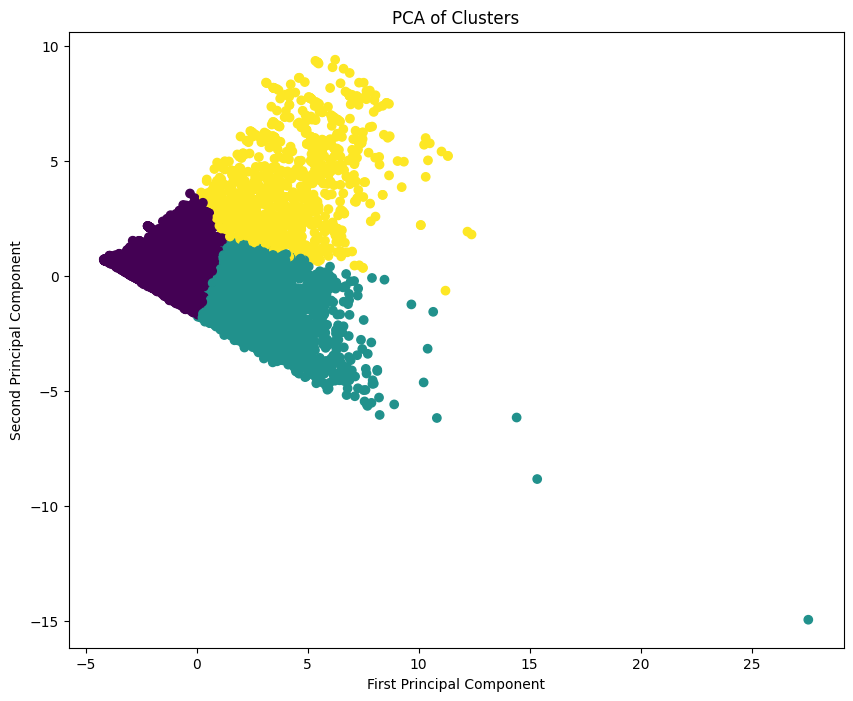

In [54]:


# Set the tracking URI to the local file path
mlflow.set_tracking_uri(r"file:///C:/Users/khaled/Mon espace de travail/E/master 2 ynov/final_study_project/ML/mlruns")

# Start a new MLflow run
with mlflow.start_run(run_name="KMeans_Clustering_2023"):

    # Set experiment name
    mlflow.set_experiment("Clustering_Experiment_2023")

    # Step 1: Sample the dataset
    df_sampled = df_3.sample(frac=0.1, random_state=42)

    # Determine the number of components dynamically based on the dataset
    n_samples, n_features = df_sampled.shape
    n_components = min(50, n_samples, n_features)  # Must be <= min(n_samples, n_features)

    # Step 2: Reduce the dataset dimensionality using PCA
    pca = PCA(n_components=n_components)
    df_reduced = pca.fit_transform(df_sampled)

    # Try different numbers of clusters with MiniBatchKMeans
    inertia = []
    silhouette_scores = []
    K = range(2, 9)

    for k in K:
        mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024)
        labels = mini_kmeans.fit_predict(df_reduced)  # Use the reduced dataset
        inertia.append(mini_kmeans.inertia_)
        # Calculate Silhouette Score on a reduced subset of data
        df_subset, labels_subset = resample(df_reduced, labels, n_samples=500, random_state=42)
        silhouette_scores.append(silhouette_score(df_subset, labels_subset))

    # Log the optimal number of clusters
    optimal_k = K[np.argmax(silhouette_scores)]
    mlflow.log_param("optimal_k", optimal_k)

    # Apply KMeans with the optimal number of clusters on the reduced dataset
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_reduced)

    # Assign the cluster labels to the same reduced dataset
    df_sampled['Cluster'] = cluster_labels  # Make sure you assign to the correct dataset

    # Log the model
    mlflow.sklearn.log_model(kmeans, "kmeans_model")

    # Create a scatter plot for visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=df_sampled['Cluster'], cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of Clusters')

    # Save plot as artifact
    plot_path = "pca_clusters.png"
    plt.savefig(plot_path)
    mlflow.log_artifact(plot_path)

    # Log the explained variance ratio of PCA
    explained_variance = pca.explained_variance_ratio_
    mlflow.log_metric("explained_variance_ratio_1", explained_variance[0])
    mlflow.log_metric("explained_variance_ratio_2", explained_variance[1])

    # Step 4: Calculate clustering metrics on the full reduced dataset
    silhouette_avg = silhouette_score(df_reduced, kmeans.labels_)  # Calculate silhouette on full reduced data
    calinski_harabasz = calinski_harabasz_score(df_reduced, kmeans.labels_)
    davies_bouldin = davies_bouldin_score(df_reduced, kmeans.labels_)

    # Log metrics
    mlflow.log_metric("Silhouette_Score", silhouette_avg)
    mlflow.log_metric("Calinski_Harabasz_Index", calinski_harabasz)
    mlflow.log_metric("Davies_Bouldin_Index", davies_bouldin)

    # Print clustering metrics
    print(f"Optimal number of clusters: {optimal_k}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")

    # Register the model after logging it
    client = MlflowClient()
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/kmeans_model"
    model_name = "kmeans_clustering_2023"

    # Register the model in the Model Registry
    mlflow.register_model(model_uri, model_name)

    # Transition the model to the "Production" stage
    model_version = 4  # You can replace with the actual version if needed
    client.transition_model_version_stage(
        name=model_name,
        version=model_version,
        stage="Staging"
    )


In [55]:
# from mlflow.tracking import MlflowClient

# # Initialize the MLflow client
# client = MlflowClient()

# # Specify the model name and version you want to delete
# model_name = "kmeans_clustering_2023"  # Replace with your actual model name
# version = 4  # Replace with the version you want to delete

# # Delete the specified model version
# client.delete_model_version(name=model_name, version=version)

# print(f"Model version {version} of '{model_name}' has been deleted.")

Model version 4 of 'kmeans_clustering_2023' has been deleted.
